In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Female-1 and male-0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data = df[['CustomerId','CreditScore','Age','Tenure','Balance','Gender','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [6]:
correlation_matrix = data.corr()
print(correlation_matrix)

                 CustomerId  CreditScore       Age    Tenure   Balance  \
CustomerId         1.000000     0.005308  0.009497 -0.014883 -0.012419   
CreditScore        0.005308     1.000000 -0.003965  0.000842  0.006268   
Age                0.009497    -0.003965  1.000000 -0.009997  0.028308   
Tenure            -0.014883     0.000842 -0.009997  1.000000 -0.012254   
Balance           -0.012419     0.006268  0.028308 -0.012254  1.000000   
Gender            -0.002641    -0.002857 -0.027544  0.014733  0.012087   
NumOfProducts      0.016972     0.012238 -0.030680  0.013444 -0.304180   
HasCrCard         -0.014025    -0.005458 -0.011721  0.022583 -0.014858   
IsActiveMember     0.001665     0.025651  0.085472 -0.028362 -0.010084   
EstimatedSalary    0.015271    -0.001384 -0.007201  0.007784  0.012797   

                   Gender  NumOfProducts  HasCrCard  IsActiveMember  \
CustomerId      -0.002641       0.016972  -0.014025        0.001665   
CreditScore     -0.002857       0.012238  -

In [7]:
df.shape

(10000, 14)

In [8]:
print("no of rows: ",df.shape[0])
print("no of cols: ",df.shape[1])

no of rows:  10000
no of cols:  14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(9), object(2)
memory usage: 1.0+ MB


In [10]:
# checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# dropping irrelevent feature
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


##### Encoding categorical data

In [15]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df=pd.get_dummies(df,drop_first=True).astype(int)

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,1


In [18]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [19]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

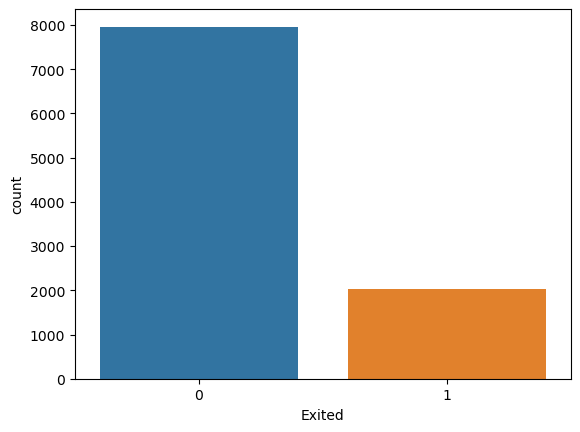

In [20]:
sns.countplot(x='Exited', data=df)

In [21]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [22]:
# Handling imbalanced data with SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [25]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### model training

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()

In [30]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
X_train

array([[-0.11073654, -0.84129353,  0.00338655, ...,  1.16970479,
        -0.57227456, -0.46350557],
       [ 1.09929136,  1.18864578,  0.10395675, ...,  0.74956503,
        -0.57227456, -0.46350557],
       [-1.24445638, -0.84129353,  0.10395675, ..., -1.52859837,
        -0.57227456, -0.46350557],
       ...,
       [ 0.20539688,  1.18864578,  0.20452695, ..., -0.05065979,
        -0.57227456, -0.46350557],
       [-0.59038724, -0.84129353,  1.41136939, ...,  1.35954739,
        -0.57227456, -0.46350557],
       [ 0.53243145,  1.18864578,  1.00908858, ..., -0.81432427,
         1.74741298, -0.46350557]])

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression()

In [34]:
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred1)

0.78060263653484

In [38]:
# for imbalanced data have to check other parameter not only accuracy
from sklearn.metrics import precision_score,recall_score,f1_score

In [39]:
precision_score(y_test,y_pred1)    #after using SMOTE increased

0.7688916876574308

In [40]:
recall_score(y_test,y_pred1)   #after using SMOTE increased

0.7862202189311011

In [41]:
f1_score(y_test,y_pred1)    #after using SMOTE increased

0.7774594078319007

### support vector classifier

In [42]:
from sklearn import svm

In [43]:
svm=svm.SVC()

In [44]:
svm.fit(X_train,y_train)

SVC()

In [45]:
y_pred2 = svm.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.8358443188951663

In [47]:
precision_score(y_test,y_pred2)

0.8297055057618438

### KNeighbour classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier()

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred3 = knn.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.8170119271814187

In [53]:
precision_score(y_test,y_pred3)

0.7964547677261614

### Decision tree classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred4 = dt.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred4)

0.7890772128060264

In [59]:
precision_score(y_test,y_pred4)

0.7704112952731738

### Random forest classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred5=rf.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred5)

0.8587570621468926

In [65]:
precision_score(y_test,y_pred5)

0.8523961661341853

### Gradient Boosing Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier()

In [68]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
y_pred6=gbc.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred6)

0.8386691776522285

In [71]:
precision_score(y_test,y_pred6)

0.8366817887232664

In [72]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [73]:
final_data

,Models,ACC
0,LR,0.780603
1,SVC,0.835844
2,KNN,0.817012
3,DT,0.789077
4,RF,0.858757
5,GBC,0.838669


In [74]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

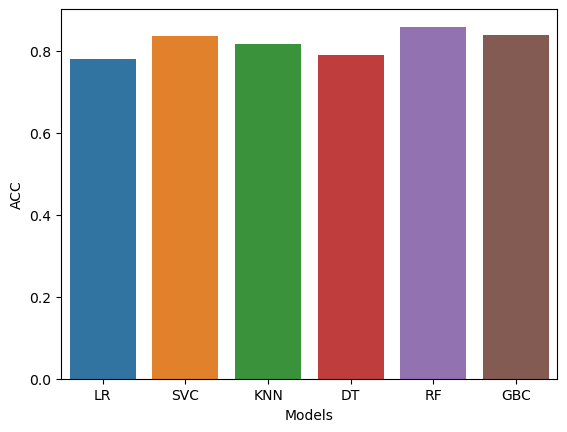

In [75]:
sns.barplot(x='Models',y='ACC',data=final_data)

In [76]:
final_data1=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'pre':[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})

In [77]:
final_data1

,Models,pre
0,LR,0.768892
1,SVC,0.829706
2,KNN,0.796455
3,DT,0.770411
4,RF,0.852396
5,GBC,0.836682


<Axes: xlabel='Models', ylabel='pre'>

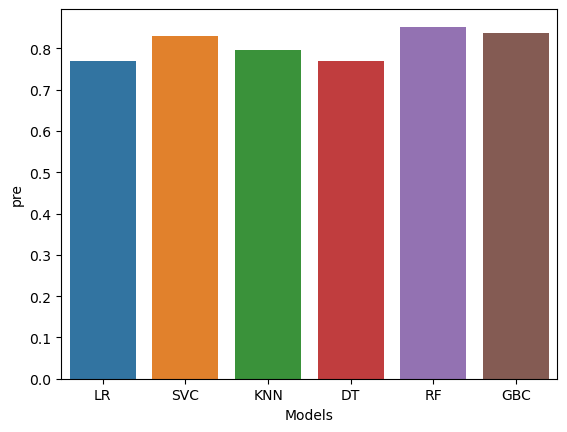

In [78]:
sns.barplot(x='Models',y='pre',data=final_data1)

In [79]:
X_res=sc.fit_transform(X_res)

In [80]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [81]:
import joblib

In [82]:
joblib.dump(rf,'Churn_predict_model')

['Churn_predict_model']

In [83]:
model=joblib.load('Churn_predict_model')

In [84]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [86]:
if(model.predict([[608,0,42,1,83801,1,0,1,101348.88,0,1]])==1):
    print('Customer can leave the bank')
else:
    print('Customer will not leave the bank')

Customer will not leave the bank
